In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
n, m = 6, 16  # number of rows and columns respectively.

In [3]:
# Random obstacles for this example. 
grid = np.zeros((n, m)) #y, x

In [4]:
position = list()
for i in range(n):
    position_row = list()
    for j in range(m):
        position_row.append([(5.6-0.6*j), (-0.2+0.6*i)])
    position.append(position_row)
for i in range(n):
    print(position[i])

[[5.6, -0.2], [5.0, -0.2], [4.3999999999999995, -0.2], [3.8, -0.2], [3.1999999999999997, -0.2], [2.5999999999999996, -0.2], [2.0, -0.2], [1.3999999999999995, -0.2], [0.7999999999999998, -0.2], [0.20000000000000018, -0.2], [-0.40000000000000036, -0.2], [-1.0, -0.2], [-1.5999999999999996, -0.2], [-2.2, -0.2], [-2.8000000000000007, -0.2], [-3.4000000000000004, -0.2]]
[[5.6, 0.39999999999999997], [5.0, 0.39999999999999997], [4.3999999999999995, 0.39999999999999997], [3.8, 0.39999999999999997], [3.1999999999999997, 0.39999999999999997], [2.5999999999999996, 0.39999999999999997], [2.0, 0.39999999999999997], [1.3999999999999995, 0.39999999999999997], [0.7999999999999998, 0.39999999999999997], [0.20000000000000018, 0.39999999999999997], [-0.40000000000000036, 0.39999999999999997], [-1.0, 0.39999999999999997], [-1.5999999999999996, 0.39999999999999997], [-2.2, 0.39999999999999997], [-2.8000000000000007, 0.39999999999999997], [-3.4000000000000004, 0.39999999999999997]]
[[5.6, 1.0], [5.0, 1.0], [

In [5]:
grid[0][3] = 1
position[0][3] = 1

grid[0][5] = 1
position[0][5] = 1

grid[1][4] = 1
position[1][4] = 1

grid[2][0] = 1
position[2][0] = 1

grid[3][7] = 1
position[3][7] = 1

grid[4][2] = 1
position[4][2] = 1

grid[4][4] = 1
position[4][4] = 1

grid[4][8] = 1
position[4][8] = 1

grid[4][9] = 1
position[4][9] = 1

grid[5][5] = 1
position[5][5] = 1

grid[5][2] = 1
position[5][2] = 1

print(grid)

[[0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


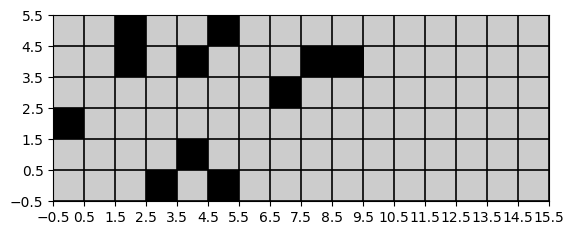

In [6]:
import matplotlib.colors as colors

def plot_grid():
    fig, ax = plt.subplots()
    cmap = colors.ListedColormap(['0.8', 'black']) 
    ax.imshow(grid, cmap=cmap, origin='lower')
    ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=1.2)
    ax.set_xticks(np.arange(-.5, m, 1));
    ax.set_yticks(np.arange(-.5, n, 1));
    
plot_grid()

In [7]:
import networkx as nx
G = nx.grid_2d_graph(n, m)

In [8]:
# Delete nodes with obstacles
for i in range(n):
    for j in range(m):
        if position[i][j] == 1:  
            G.remove_node((i,j))
print(G.nodes())

[(0, 0), (0, 1), (0, 2), (0, 4), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (1, 0), (1, 1), (1, 2), (1, 3), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (2, 15), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (4, 0), (4, 1), (4, 3), (4, 5), (4, 6), (4, 7), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (5, 0), (5, 1), (5, 3), (5, 4), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13), (5, 14), (5, 15)]


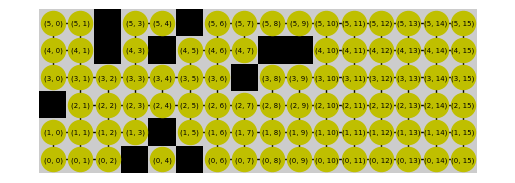

In [9]:
plot_grid()
pos = {node:(node[1], node[0]) for node in G.nodes()}
nx.draw(G, pos, font_size=5, with_labels=True, node_size=300, node_color="y")

In [10]:
start1 =  (5,0)
end1 = (0,15)

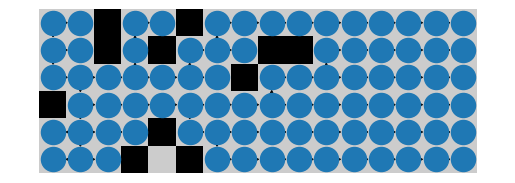

In [11]:
bfs = nx.bfs_tree(G, source=start1)
plot_grid()
nx.draw(bfs, pos=pos)

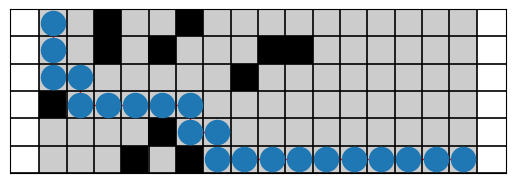

In [14]:
# Pick the last element and iterate through its predecessors
path = [end1]   # A path in a graph is a set of connected nodes
current = end1

# iterate through its predecessors until finding source node
while current != start1:
    # Predecesors of the current node        
    for pre in bfs.predecessors(current):
        current = pre
    # add the predecessor to the path
    path.append(pre)
    
# The current path starts in the goal node and ends at the start node. So we invert it
path = path[::-1]
route = list()

for i in range(len(path)):
    route.append(position[(path[i][0])][(path[i][1])])
    
# Edges of the path
E = [(path[i], path[i+1])for i in range(len(path)-1)]
plot_grid()
nx.draw_networkx_nodes(path, pos)
nx.draw_networkx_edges(G, edgelist=E, pos=pos, edge_color='r')

In [15]:
print(path)
print(route)

[(5, 0), (4, 0), (3, 0), (3, 1), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (1, 5), (1, 6), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15)]
[[5.6, 2.8], [5.6, 2.1999999999999997], [5.6, 1.5999999999999999], [5.0, 1.5999999999999999], [5.0, 1.0], [4.3999999999999995, 1.0], [3.8, 1.0], [3.1999999999999997, 1.0], [2.5999999999999996, 1.0], [2.5999999999999996, 0.39999999999999997], [2.0, 0.39999999999999997], [2.0, -0.2], [1.3999999999999995, -0.2], [0.7999999999999998, -0.2], [0.20000000000000018, -0.2], [-0.40000000000000036, -0.2], [-1.0, -0.2], [-1.5999999999999996, -0.2], [-2.2, -0.2], [-2.8000000000000007, -0.2], [-3.4000000000000004, -0.2]]


In [ ]:
for i in range(len(path)):
    